In [251]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


df = pd.read_csv('data/Phishing_Legitimate_full.csv')
df


## Loading of Data and Initial EDA

In [252]:
df = pd.read_csv('data/dataset_B_05_2020.csv')
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [254]:
# Setting paramters for matplotlib graphs to default to this size
plt.rcParams['figure.figsize'] = (20,10)

The target variable in this project is going to be the `status` column, which has string values of `phishing` and `legitimate`.

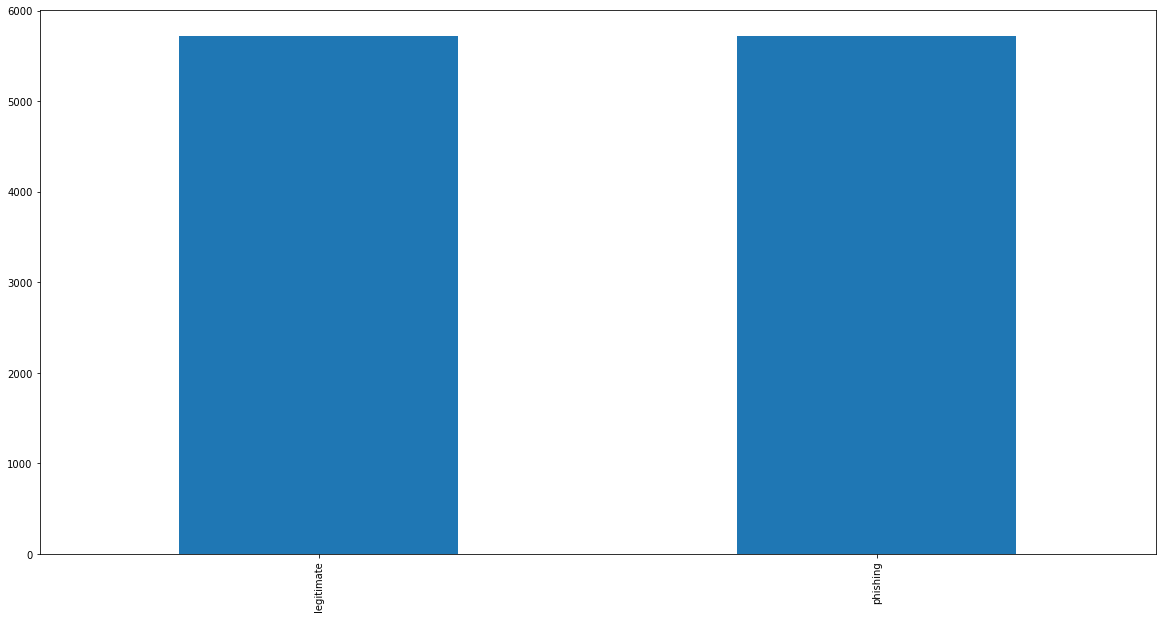

In [255]:
# Visualizing initial split of our target variable. There is an even split between the phishing and legitimate values,
# so we do not have any class imbalance here.
df['status'].value_counts().plot(kind='bar');

In [256]:
# Created simple for loop to print out values in each column just to visualize and investigate
# Commented this out since the output is very lengthy
# for c in df.columns:
#    print("---- %s ---" % c)
#3    print(df[c].value_counts())

In [257]:
# Exploring the data based on the value counts above just to visualize what some URLs would look like
df.loc[df['longest_words_raw'] == 829]
df['url'][6791]

'http://systemupdatingserverservice.secureonlineaccessupdate.com/Chase/home/auth/Confirmed.php?Fetch=3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d2b5b205573657220496e666f202d2043686173652052655a756c7a205d2b3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d3d0d0a557365724944203a206467666764686667680d0a50617373776f72642020203a2064747268686667676866676a0d0a4669727374204e616d653a2065737464676668676a680d0a4c617374204e616d653a20646866676a686b0d0a416464726573733a20323334206668676768686a0d0a436974793a20747274797569696f0d0a53746174653a2065646f0d0a5a69703a2032333534350d0a50686f6e653a203938303635373836350d0a536f6369616c205365637572697479204e756d6265723a203535343533393935350d0a4d6f746865722773204d616964656e204e616d653a2064676664676867660d0a44617465206f662042697274683a2032333435363736352028204d6f6e7468202d20446179202d205965617220290d0a3d3d3d3d3d3d3d3d3d3d3d3d3d205b2042616e6b2026204361726420496e666f205d203d3d3d3d3d3d3d3d3d3d3d3d3d0d0a43617264204272616e643&header=1'

In [258]:
# Calling describe just to get a general breakdown of the dataset.
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [259]:
df.columns
df['longest_words_raw'].max()

829

In [260]:
# Dropped these columns because all the values present in these columns were 0
columns_to_drop = ['nb_or', 'nb_space', 'submit_email','ratio_intRedirection','ratio_intErrors', 'ratio_nullHyperlinks', 'sfh' ]
df_dropped = df.copy().drop(columns = columns_to_drop)

In [261]:
# Since this is a classification project, I am changing the values in the status columns from legitimate: 0
# and the values of phishing: 1
df_label = pd.DataFrame(df_dropped['status'].copy())
phish = df_label.replace({"status": {"legitimate" : 0, 
                                "phishing" : 1}})
df_dropped['status'] = phish

In [262]:
df_dropped 

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,0
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,1,...,1,0,0,211,6728,0,0,1,0,1
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,1,...,0,0,0,2809,8515,8,0,1,10,0
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,0


### Some functions to be used throughout project

In [263]:
# Function that plots correlation heatmap in batches since there are so many initial features
def partial_heatmap(data, start, stop):
    y = data['status']
    df = data.iloc[:, start:stop]
    sns.heatmap(df.corr(), annot=True, fmt='.2f')
    plt.show()
    
# Function that prints out training/test scores for each metric of training and test data and corresponding confusion matrix
def score_matrix_printer(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Cleaning up scores to be more visually appealing
    ascore_train = round((accuracy_score(y_train, train_pred) * 100), 2)
    pscore_train = round((precision_score(y_train, train_pred) * 100), 2)
    rscore_train = round((recall_score(y_train, train_pred) * 100), 2)
    
    ascore_test = round((accuracy_score(y_test, test_pred) * 100), 2)
    pscore_test = round((precision_score(y_test, test_pred) * 100), 2)
    rscore_test = round((recall_score(y_test, test_pred) * 100), 2)
    
    conf_mat = plot_confusion_matrix(model, X_test, y_test)
    roc_cirve = plot_roc_curve(model, X_test, y_test)
    
    print(f"""
    Train Accuracy: {ascore_train}%
    Train Precision: {pscore_train}%
    Train Recall: {rscore_train}%
    ------------------------------
    Test Accuracy: {ascore_test}%
    Test Precision: {pscore_test}%
    Test Recall: {rscore_test}%
    """)

def get_stats(x_columns):
    x = df[x_columns]
    results = sm.OLS(y, X).fit()
    print(results.summary())

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

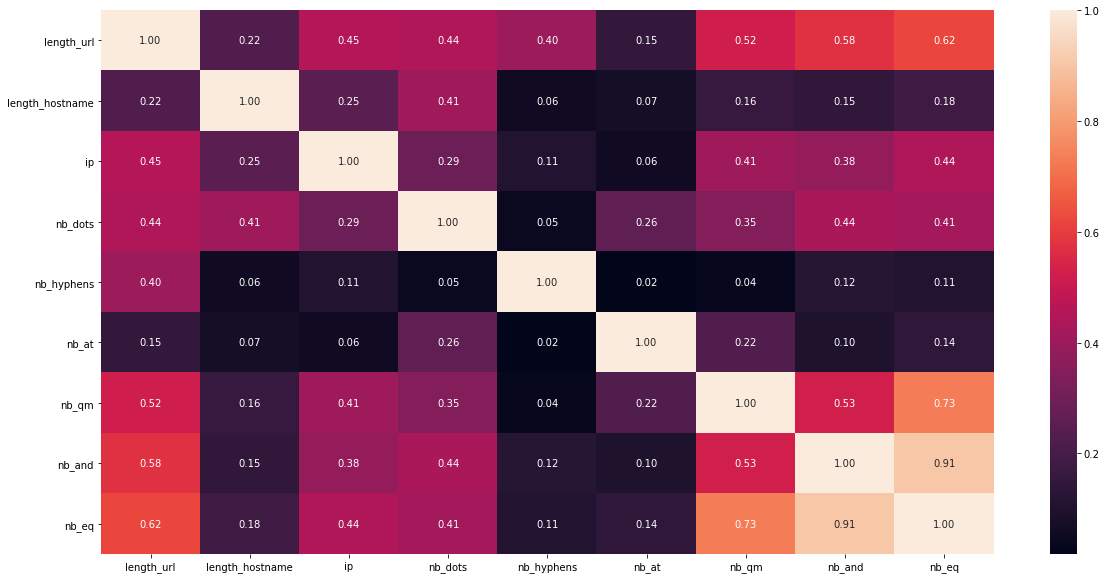

In [265]:
partial_heatmap(df_dropped, 0, 10)


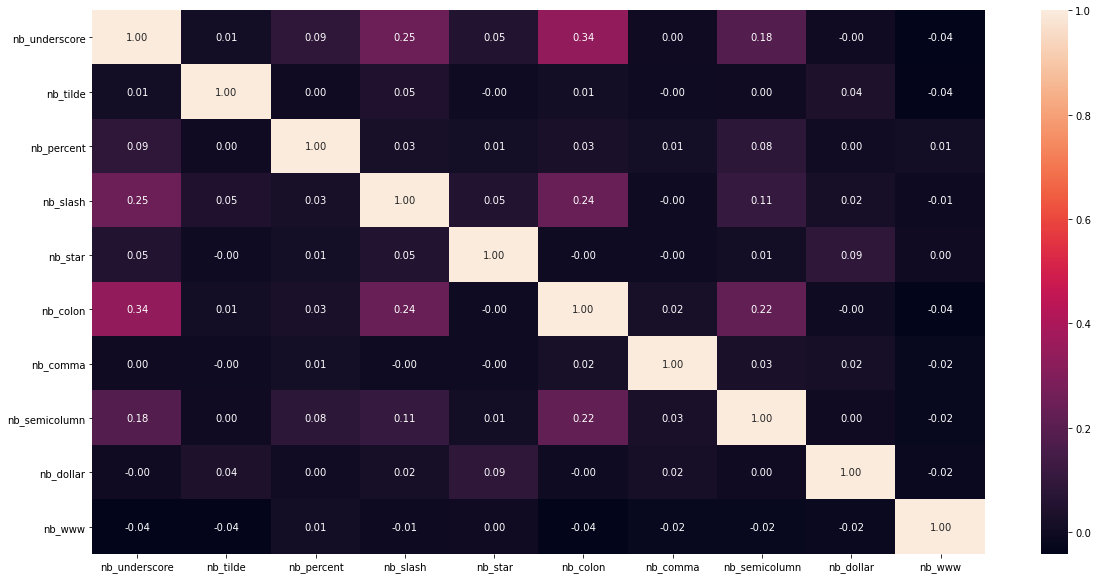

In [266]:
partial_heatmap(df_dropped, 10, 20)


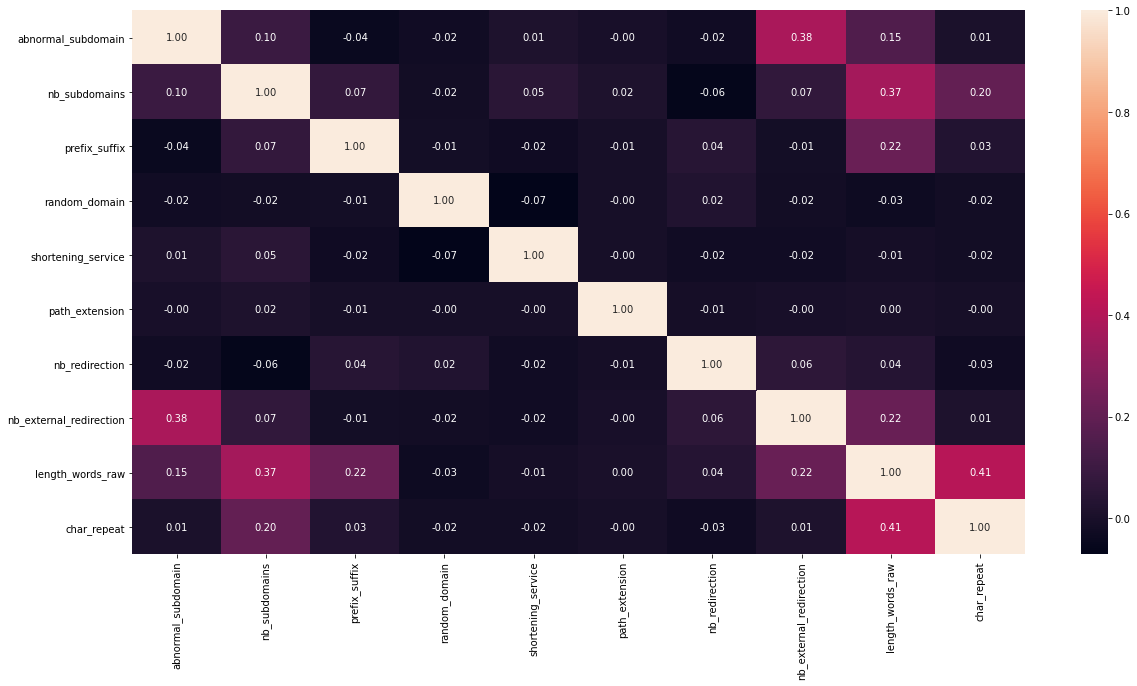

In [267]:
partial_heatmap(df_dropped, 30, 40)


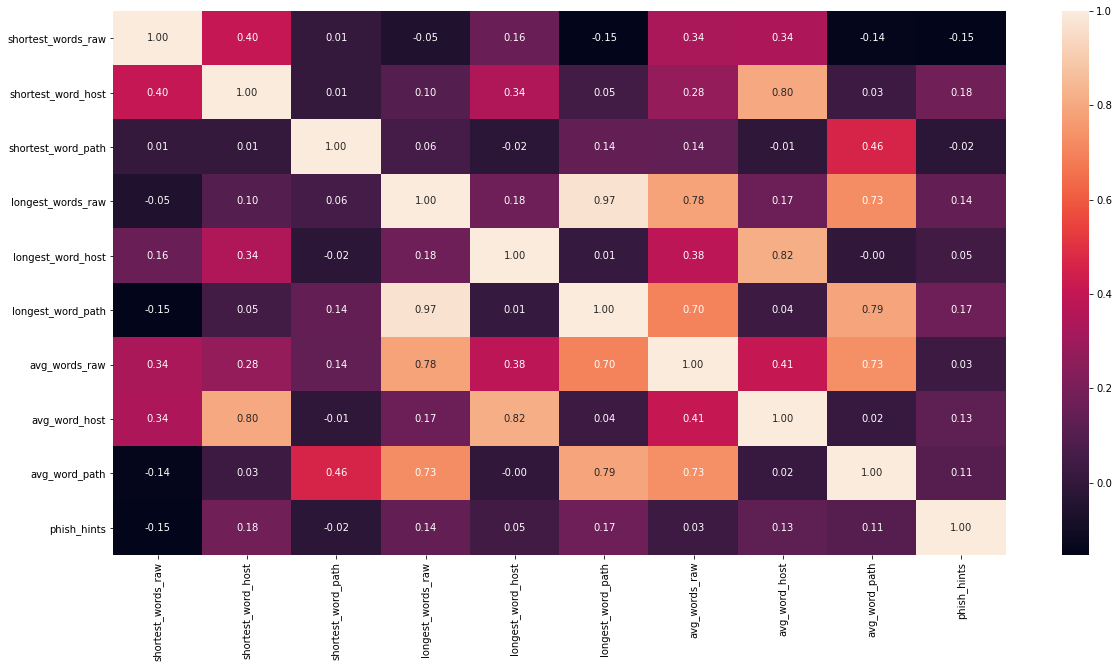

In [268]:
partial_heatmap(df_dropped, 40, 50)


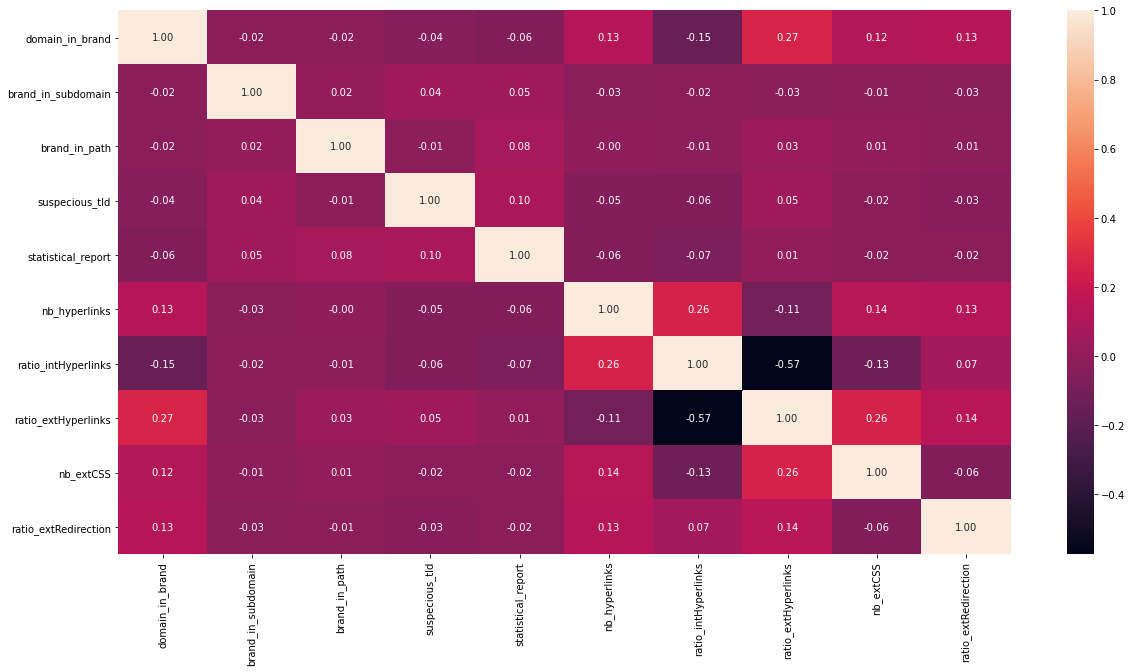

In [269]:
partial_heatmap(df_dropped, 50, 60)


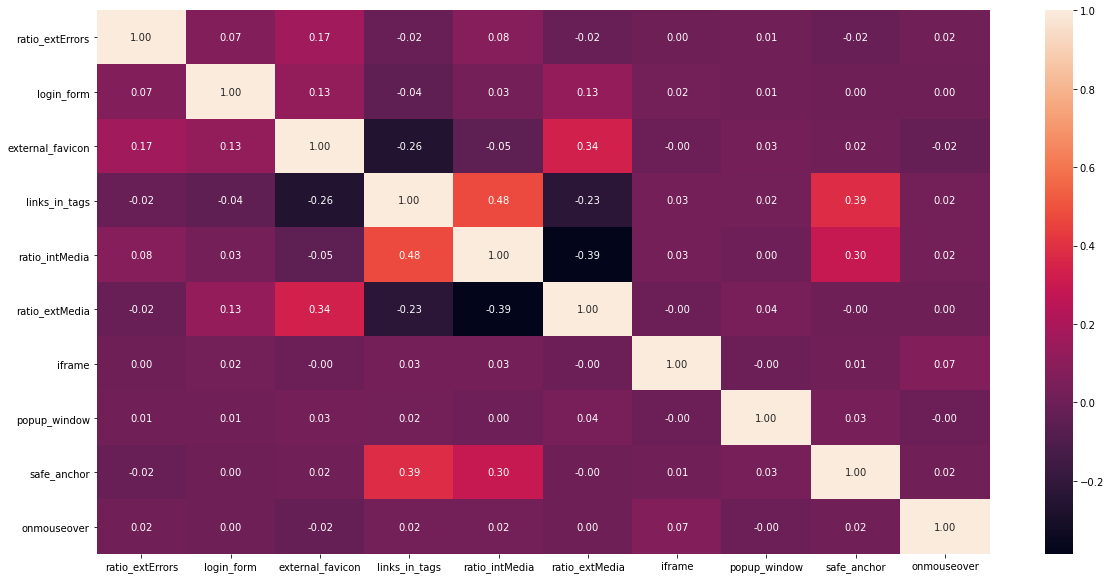

In [270]:
partial_heatmap(df_dropped, 60, 70)


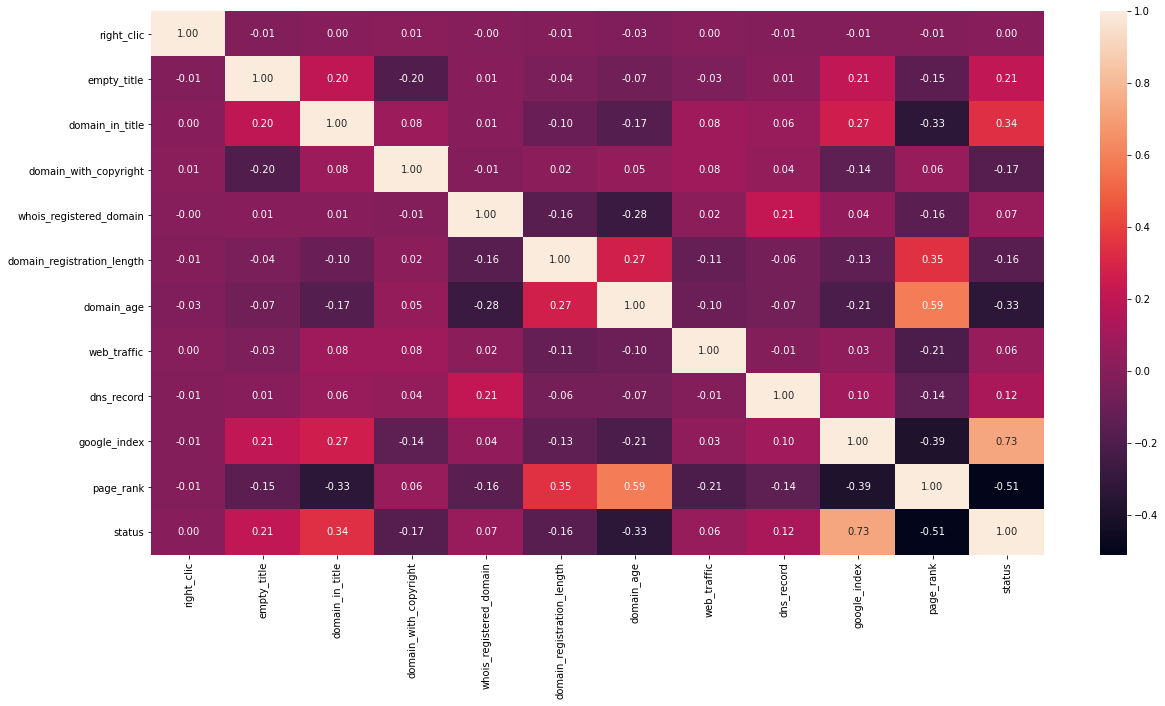

In [271]:
partial_heatmap(df_dropped, 70, 82)


After investigating multicollinearity between some variables, I decided to drop the 

My cutoff for high correlation will be X > 0.7

In [272]:
# Created a copy of dataframe where URLs are just replaced with their corresponding index
# Keeping the URLs in separate dataframe for reference
dropped_url_df = df_dropped.copy()
dropped_url_df['url'] = dropped_url_df.index

# Stepwise selection for feature importance

In [273]:
# Run a summary stats to see what the p-values are. Drop features that have p-value > 0.05
get_stats(listtopfeatures)

                                 OLS Regression Results                                
Dep. Variable:                 status   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              860.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):                        0.00
Time:                        15:25:36   Log-Likelihood:                         -1024.7
No. Observations:               11430   AIC:                                      2211.
Df Residuals:                   11349   BIC:                                      2806.
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [295]:
# based on the statistical report, these features had a p-valuen of > 0.05
features_to_drop = ['url', 'length_url', 'nb_hyphens', 'nb_and', 'nb_underscore', 'nb_tilde', 'nb_star', 'nb_comma', 'nb_semicolumn', 'nb_dollar', \
'nb_com', 'nb_dslash', 'http_in_path', 'punycode', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', \
'prefix_suffix', 'random_domain', 'path_extension', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', \
'longest_words_raw', 'longest_word_host', 'avg_words_raw', 'avg_word_host', 'brand_in_subdomain', 'brand_in_path', \
'statistical_report', 'nb_extCSS', 'ratio_extErrors', 'login_form', 'links_in_tags', 'iframe', 'popup_window', \
'onmouseover', 'right_clic', 'web_traffic']

stepwisedf = dropped_url_df.drop(columns=features_to_drop) 

In [296]:
stepwisedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_hostname             11430 non-null  int64  
 1   ip                          11430 non-null  int64  
 2   nb_dots                     11430 non-null  int64  
 3   nb_at                       11430 non-null  int64  
 4   nb_qm                       11430 non-null  int64  
 5   nb_eq                       11430 non-null  int64  
 6   nb_percent                  11430 non-null  int64  
 7   nb_slash                    11430 non-null  int64  
 8   nb_colon                    11430 non-null  int64  
 9   nb_www                      11430 non-null  int64  
 10  https_token                 11430 non-null  int64  
 11  ratio_digits_url            11430 non-null  float64
 12  ratio_digits_host           11430 non-null  float64
 13  port                        114

# Baseline model (Dummy Classifier)


In [301]:
# Creating X and y variables for initial train/test split.
# This train/test split is based on the
X = stepwisedf.drop(columns = 'status')
y = stepwisedf['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

C:\Users\Beter\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "



    Train Accuracy: 49.85%
    Train Precision: 49.77%
    Train Recall: 49.73%
    ------------------------------
    Test Accuracy: 49.58%
    Test Precision: 49.83%
    Test Recall: 50.49%
    


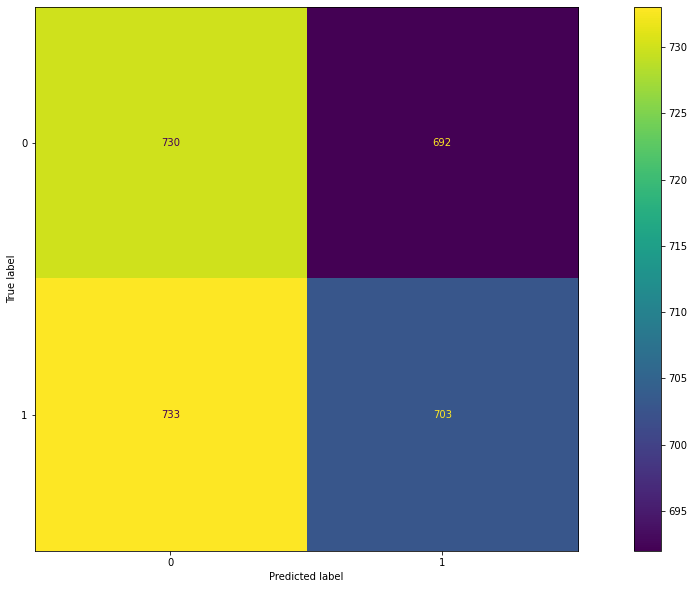

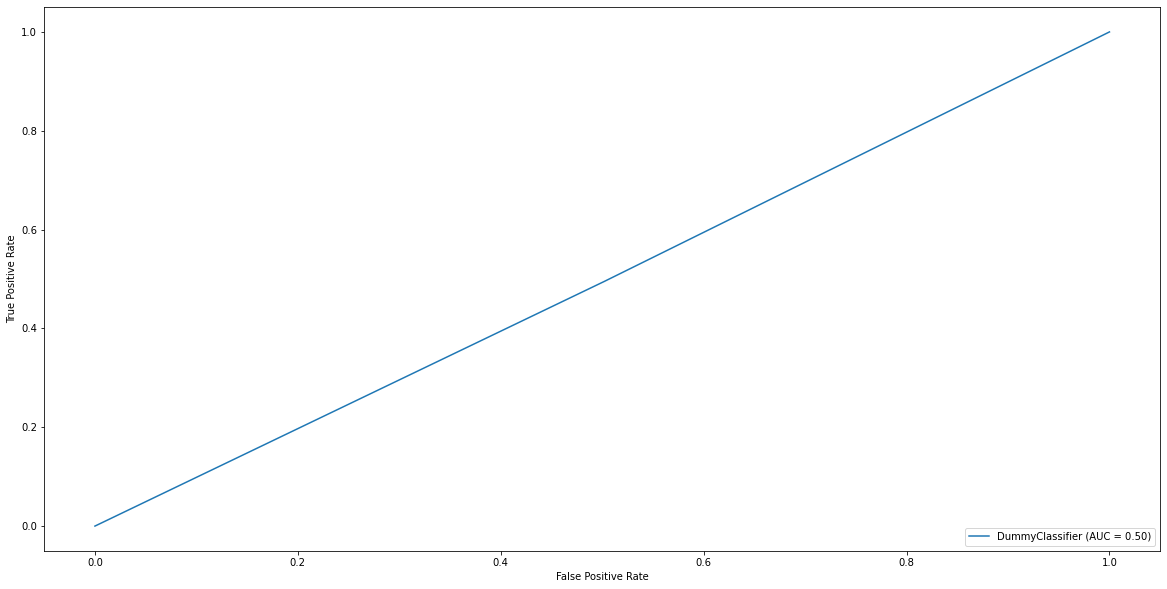

In [302]:
# Dummy Classifier as baseline model
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_train)
y_test_pred = dummy.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)
dummy.score(X_test, y_test)
score_matrix_printer(dummy, X_train, y_train, X_test, y_test);

# Feature Importance (ExtraTreeClassifier)

[1.44486986e-02 2.94990362e-02 1.26896471e-02 2.31761819e-03
 1.55030494e-02 8.12496319e-03 3.27468777e-03 1.45089563e-02
 2.11952994e-03 5.57919031e-02 7.81662777e-03 1.46693515e-02
 9.96559707e-03 5.26534260e-04 1.19460481e-02 1.10151160e-02
 1.00011817e-02 2.89480179e-05 1.41562225e-02 1.15151730e-02
 1.36363658e-02 1.08307738e-02 2.59284112e-02 8.22141391e-03
 3.23314430e-03 1.90608100e-02 3.42811936e-02 2.20240519e-02
 1.27830805e-02 8.95613535e-03 1.36671024e-02 1.36428521e-02
 2.77339141e-02 1.23043708e-02 4.33726359e-02 1.86824267e-02
 3.16704208e-03 1.24522145e-02 3.76531124e-02 3.13762963e-03
 2.93245904e-01 1.12066526e-01]


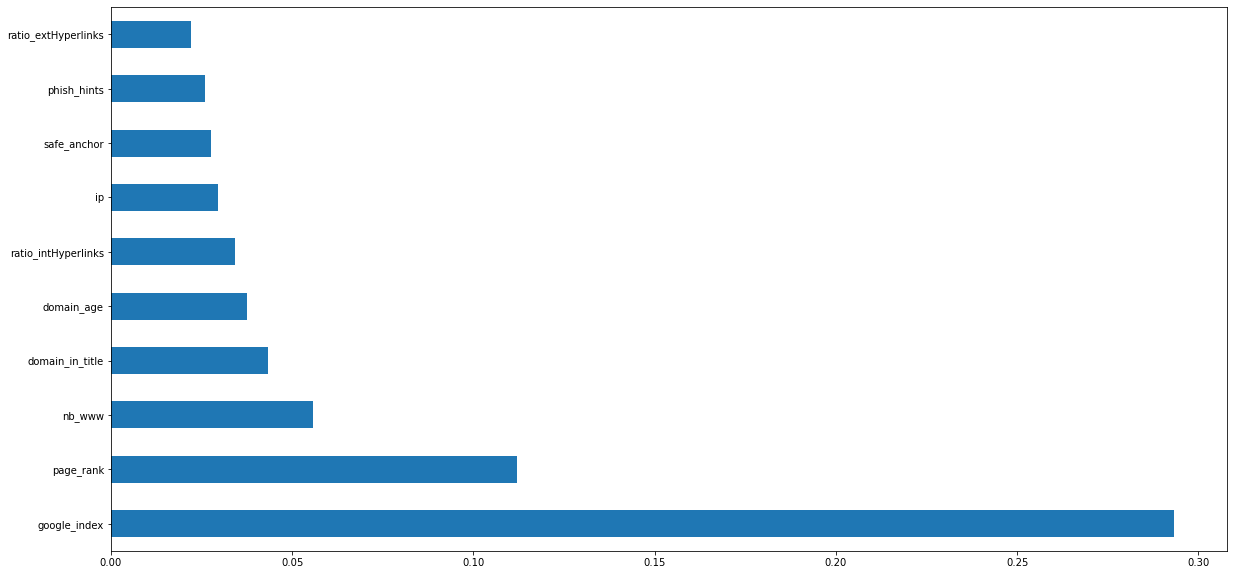

In [305]:
# Instantiate model
modelfeatures = ExtraTreesClassifier()
modelfeatures.fit(X, y)
print(modelfeatures.feature_importances_) # use built in class 'feature_importances' of tree based classifiers
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(modelfeatures.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [307]:
# Created a list of top features from ExtraTreeClassifier 
listtopfeatures = ['domain_age', 'google_index', 'page_rank', 'domain_in_title', 'ip', \
    'ratio_intHyperlinks', 'ratio_extHyperlinks', 'nb_www', 'safe_anchor', 'phish_hints']

# Created a dataframe with the features identified from ExtraTreeClassifier
extraTreeX = X[listtopfeatures]
extraTreeX

# Train/test split for top features from ExtraTreeClassifier
X1_train, X1_test, y1_train, y1_test = train_test_split(extraTreeX, y, random_state = 42)


    Train Accuracy: 92.08%
    Train Precision: 91.94%
    Train Recall: 92.22%
    ------------------------------
    Test Accuracy: 92.37%
    Test Precision: 91.66%
    Test Recall: 93.31%
    


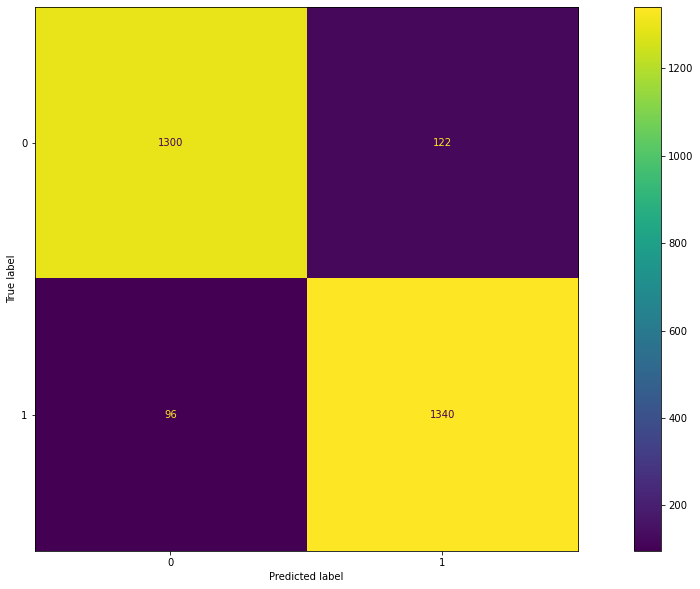

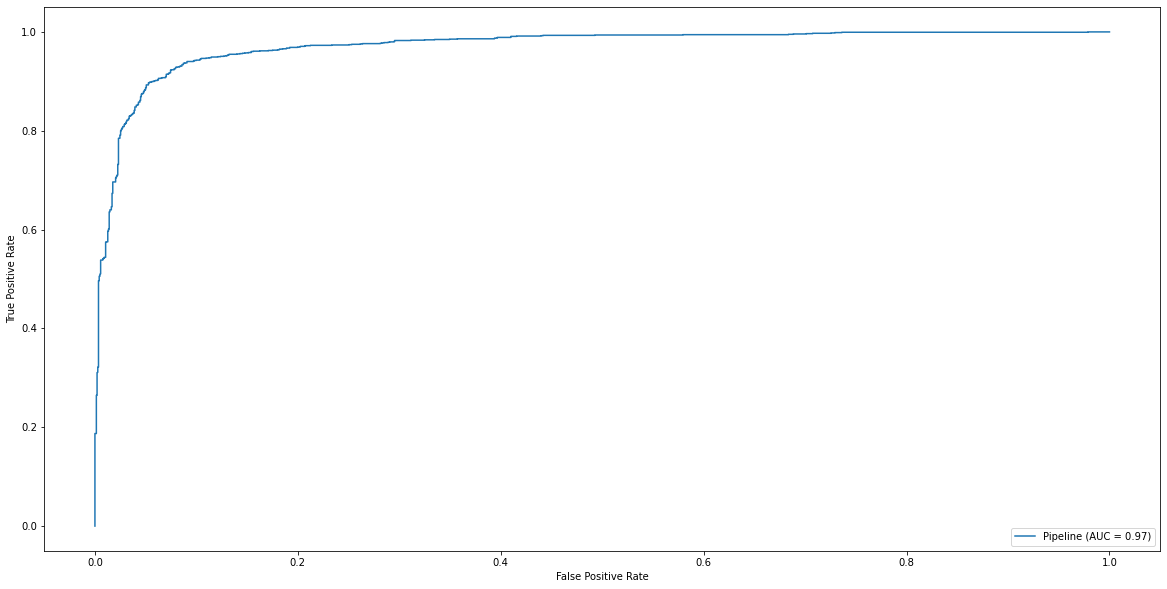

In [308]:
# Pipeline w/ StandardScalar and LogisticRegression steps w/ ExtraTreeClassifier features
lrpipe.fit(X1_train, y1_train)
lr_pipe_preds = lrpipe.predict(X1_train)
score_matrix_printer(lrpipe, X1_train, y1_train, X1_test, y1_test)

This feature importance graph shows both the positive and negatively correlated features that may be important in my project/modeling.

## First Simple Logistic Regression Model

In [280]:
# Simple Logistic Regression Model 
# Set max_iter hyperparameter = 1000 since there are so many initial features
# Will likely be dropping/aggregating columns since there are a few features with high correlation w/ each other.
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)


    Train Accuracy: 78.59%
    Train Precision: 77.49%
    Train Recall: 80.51%
    ------------------------------
    Test Accuracy: 78.48%
    Test Precision: 77.98%
    Test Recall: 79.67%
    


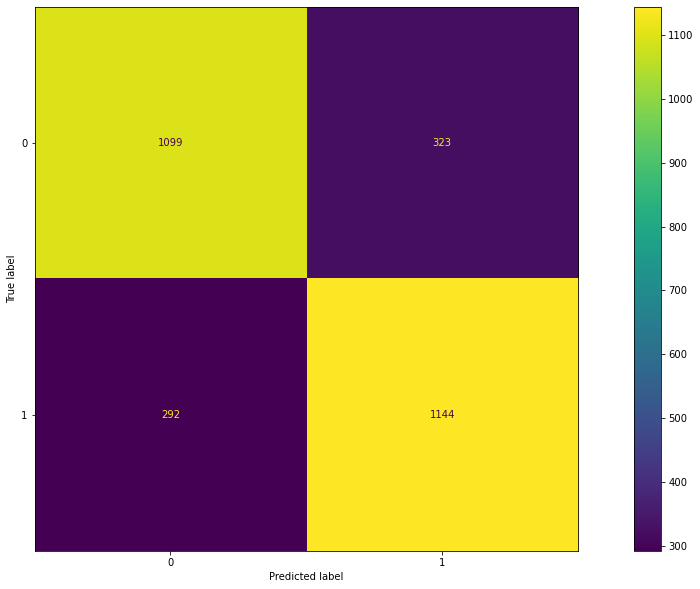

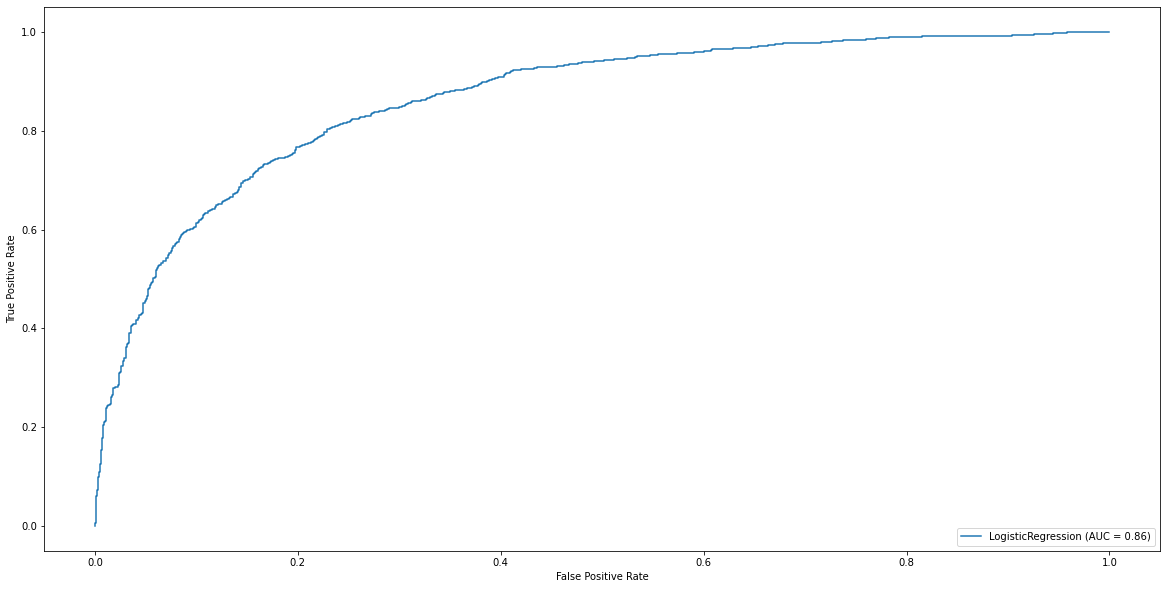

In [281]:
score_matrix_printer(lr, X_train, y_train, X_test, y_test)

In [282]:
# Since the coefficients are in log-odds, take the exponent to see the odds of each feature based on the initial logistic regression model
np.exp(lr.coef_)

array([[1.00003957, 1.02011302, 1.0059035 , 1.0001427 , 1.00060881,
        0.99977922, 1.00002682, 1.00012149, 1.00012749, 1.00023773,
        1.0000689 , 1.00000034, 1.00003291, 1.00108945, 1.0000006 ,
        1.00016626, 1.00000271, 1.00005103, 1.00000137, 0.99978248,
        1.000078  , 1.0000055 , 1.0000086 , 1.00013614, 1.00004082,
        1.00002599, 1.00000008, 1.00000071, 1.00002869, 1.00005359,
        1.0000198 , 1.00037103, 1.00012749, 1.00001635, 1.00007993,
        1.00000009, 1.00009735, 1.00000294, 1.00172496, 1.00021407,
        1.00035257, 1.00167411, 1.00066478, 1.00596692, 1.00212726,
        1.00589066, 1.00164766, 1.00183024, 1.00212918, 1.00035883,
        1.00000447, 1.00000495, 1.00000502, 1.00001861, 1.00005013,
        0.98237467, 1.00001346, 1.00007407, 0.99999779, 0.99998942,
        1.00000972, 1.0000099 , 1.00003267, 1.00109027, 1.00194471,
        0.9981654 , 0.99999982, 0.99999611, 1.00065565, 0.99999979,
        1.00000067, 1.0000553 , 1.00024999, 1.00

The score and curve of the model and data look pretty good for now; however, next steps would be to reduce the complexity of the data and really pinpoint what features are most important in detecting a phishing URL.

## Pipeline Implementation

In [283]:
# LogisticRegression Pipeline
lrpipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

# PCA pipeline 
pcapipe = Pipeline(steps=[
    ('pca', PCA())
    
])

# RFE pipeline
rfepipe = Pipeline(steps=[
    ('rfe', RFE(estimator = modelfeatures))
])

rfcpipe = Pipeline(steps=[
    ('rfc', RandomForestClassifier())
])

# Model 2: Pipeline Integration 


    Train Accuracy: 94.6%
    Train Precision: 94.89%
    Train Recall: 94.25%
    ------------------------------
    Test Accuracy: 95.17%
    Test Precision: 95.51%
    Test Recall: 94.85%
    


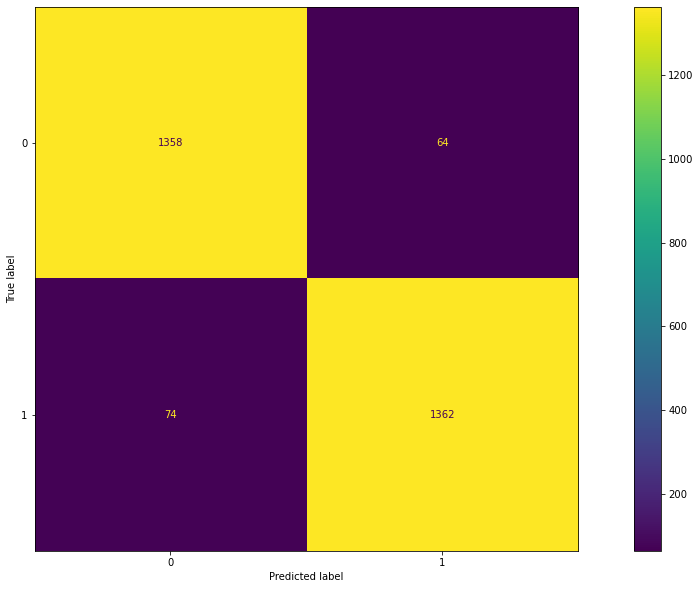

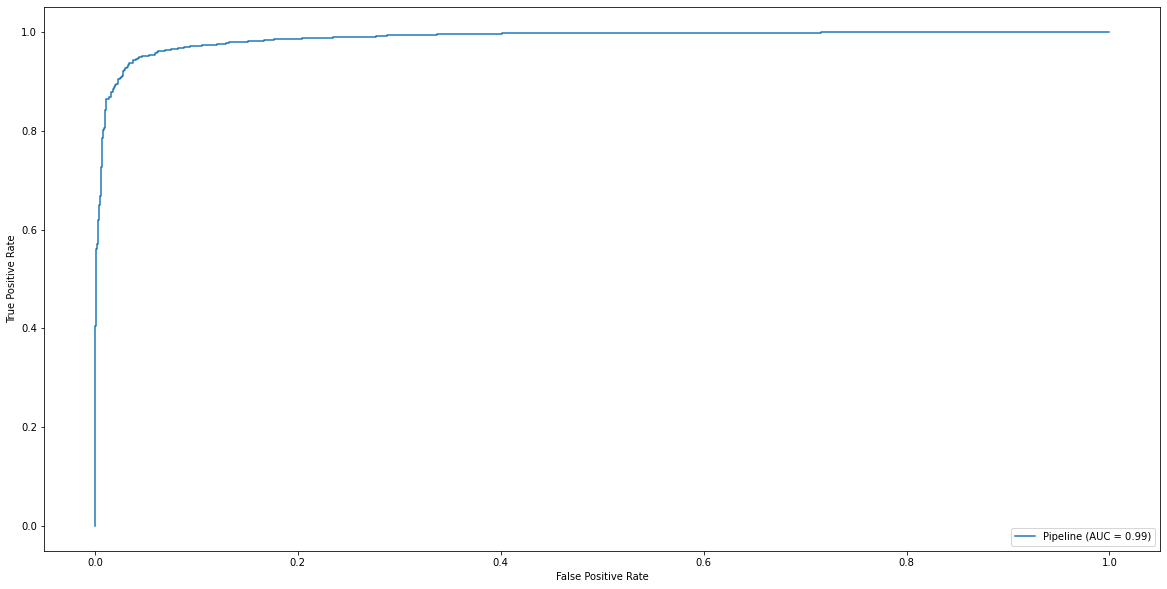

In [284]:
# LogisticRegression pipeline with StandardScalar
lrpipe.fit(X_train, y_train)
lr_pipe_preds = lrpipe.predict(X_train)
score_matrix_printer(lrpipe, X_train, y_train, X_test, y_test)

## GridSearchCV for optimal hyperparameters

In [285]:
# Setting up GridSearchCV but not going to utilize it yet
# grid = {'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


## PCA


Put a stop on PCA(can add to appendix) - since the first component accounts for ~99% in variability in the data. Tried to reduce dimesnionality but didn't really work. Will move on to RFE/Stepwise selection instead.

In [286]:
# Initial PCA
pca = PCA(n_components=5)
pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print(pca.components_)

[9.99994706e-01 2.70476378e-06 2.41216622e-06 1.66612128e-07
 7.27829208e-09]
[[-2.33963990e-05  2.04407533e-06  8.44126346e-07  2.97371760e-08
   6.05049282e-08 -3.46858735e-08 -1.28476172e-09  2.52291128e-08
   6.83164816e-08  9.10451641e-08  4.84087435e-08 -6.07781867e-10
  -6.08859532e-09 -9.73211447e-10 -1.25291769e-10 -1.37962305e-09
   3.10888303e-10  1.07275935e-09  1.86954972e-09  1.43978205e-09
   3.00790521e-08  9.02844405e-10  1.17058224e-09 -1.89960654e-09
   2.88331415e-09 -2.42945196e-09 -2.50583442e-11 -1.52735801e-10
  -8.65104383e-09  3.29562980e-08 -3.04170450e-09  2.60800177e-08
   1.40424687e-08  2.30302296e-09 -1.32270485e-08 -2.50583459e-11
  -1.02959428e-08 -6.26458605e-10  1.45487914e-07  4.91509013e-08
  -1.40107279e-08 -5.09870630e-08 -8.08711431e-08  1.23649477e-08
   9.99530309e-08  4.36381301e-08  3.44719477e-08  4.30035063e-08
  -1.25963057e-08 -1.20144909e-08 -1.63561631e-08 -6.62785401e-10
   1.12680220e-09 -1.28791561e-09 -5.12862273e-09 -3.81735536e-0

## Recursive Feature Elimination

In [287]:
# Going to be trying RFE since I have so many features that will increase model complexity
# Very initial RFE process, will clean it up 
selector = RFE(estimator = modelfeatures, n_features_to_select=10)
selector.fit(X_train, y_train)

RFE(estimator=ExtraTreesClassifier(), n_features_to_select=10)

In [288]:
# Displaying the support and ranking of preliminary RFE
print(selector.support_)
print(selector.ranking_)
selectorrankinglist = selector.ranking_

[False False  True False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True False False
 False False False False False False False False  True False False False
  True False False False  True False False  True  True]
[41 17  1  2 14 15 52 13 53 37 42 61 44  7 68 56 66 57 70  1 46 59 51 35
  8 30 71 60 54 40 55 20 23 43 39 72 26 69  5 24 25 12 34 16 29  3 28 33
 19  4 31 65 63 48 50  1  1  1 38 22 36 45 32  6 10  9 64 58  1 67 62 27
  1 11 47 18  1 21 49  1  1]


In [289]:
# Created a list of important features based on RFE
important_features = ['length_hostname', 'nb_dollar', 'longest_words_raw', 'suspecious_tld', 'statistical_report', 'links_in_tags', \
'sfh', 'domain_in_title', 'onmouseover', 'domain_with_copyright', 'nb_hyperlinks', 'ip']

In [290]:
# selectorrankinglist = selectorrankinglist.tolist()
columnanames = df.columns.tolist()

In [291]:
columnanames
rfe_names = dict(zip(columnanames, selectorrankinglist))

In [292]:
rfe_names

{'url': 41,
 'length_url': 17,
 'length_hostname': 1,
 'ip': 2,
 'nb_dots': 14,
 'nb_hyphens': 15,
 'nb_at': 52,
 'nb_qm': 13,
 'nb_and': 53,
 'nb_or': 37,
 'nb_eq': 42,
 'nb_underscore': 61,
 'nb_tilde': 44,
 'nb_percent': 7,
 'nb_slash': 68,
 'nb_star': 56,
 'nb_colon': 66,
 'nb_comma': 57,
 'nb_semicolumn': 70,
 'nb_dollar': 1,
 'nb_space': 46,
 'nb_www': 59,
 'nb_com': 51,
 'nb_dslash': 35,
 'http_in_path': 8,
 'https_token': 30,
 'ratio_digits_url': 71,
 'ratio_digits_host': 60,
 'punycode': 54,
 'port': 40,
 'tld_in_path': 55,
 'tld_in_subdomain': 20,
 'abnormal_subdomain': 23,
 'nb_subdomains': 43,
 'prefix_suffix': 39,
 'random_domain': 72,
 'shortening_service': 26,
 'path_extension': 69,
 'nb_redirection': 5,
 'nb_external_redirection': 24,
 'length_words_raw': 25,
 'char_repeat': 12,
 'shortest_words_raw': 34,
 'shortest_word_host': 16,
 'shortest_word_path': 29,
 'longest_words_raw': 3,
 'longest_word_host': 28,
 'longest_word_path': 33,
 'avg_words_raw': 19,
 'avg_word_hos

In [293]:
rfeX = df[listtopfeatures]

rfeX

,status,google_index,page_rank,domain_in_title,ip,ratio_intHyperlinks,domain_age,nb_www,safe_anchor,phish_hints
0,legitimate,1,4,0,0,0.529412,-1,1,0.000000,0
1,phishing,1,2,1,1,0.966667,5767,0,100.000000,0
2,phishing,1,0,1,1,1.000000,4004,0,100.000000,0
3,legitimate,0,3,1,0,0.973154,-1,0,62.500000,0
4,legitimate,0,6,0,0,0.470588,8175,1,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
11425,legitimate,0,6,0,0,0.884422,5396,1,0.000000,0
11426,phishing,1,0,1,0,1.000000,6728,1,0.000000,0
11427,legitimate,1,10,0,1,0.470588,8515,1,80.000000,0
11428,legitimate,0,4,1,0,0.375000,2836,1,0.000000,0


In [294]:
X2_train, X2_test, y2_train, y2_test = train_test_split(rfeX, y, random_state = 42)
lrpipe.fit(X2_train, y2_train)
lr_pipe_preds = lrpipe.predict(X2_train)
score_matrix_printer(lrpipe, X2_train, y2_train, X2_test, y2_test)

ValueError: could not convert string to float: 'phishing'